## Feature Engineering for Hanwella Water Level Prediction (24h and 48h Maximum)

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data
# Replace 'your_data.csv' with your actual data file
df = pd.read_csv('Df_final Version_1.csv')
df.head()

,timestamp,Hanwella_WaterLevel,Glencourse_WaterLevel,Glencourse_WaterLevel_Lagged_3h,Glencourse_WaterLevel_Lagged_24h,Glencourse_WaterLevel_Lagged_48h,Hanwella_StreamFlow,Glencourse_StreamFlow,Glencourse_StreamFlow_Lagged_3h,Hanwella_Rainfall,...,Hanwella_cumRF_24h_Lagged,Glencourse_cumRF_24h_Lagged,Holombuwa_cumRF_24h_Lagged,Kithulgala_cumRF_24h_Lagged,Deraniyagala_cumRF_24h_Lagged,Hanwella_cumRF_48h_Lagged,Glencourse_cumRF_48h_Lagged,Holombuwa_cumRF_48h_Lagged,Kithulgala_cumRF_48h_Lagged,Deraniyagala_cumRF_48h_Lagged
0,10/4/2013 0:00,1.610,9.250,9.296,9.372,9.494,33.65,65.250,67.500,0.0,...,7.2,21.3,0.0,3.5,0.0,19.1,23.8,7.0,16.5,11.9
1,10/4/2013 1:00,1.609,9.243,9.282,9.360,9.522,33.61,64.889,66.833,6.0,...,7.2,21.3,0.0,3.5,0.0,19.1,23.8,7.0,16.5,11.9
2,10/4/2013 2:00,1.605,9.237,9.264,9.338,9.555,33.51,64.611,65.917,9.0,...,7.2,21.3,0.0,3.5,0.0,19.1,23.8,7.0,16.5,11.9
3,10/4/2013 3:00,1.600,9.235,9.250,9.326,9.570,33.38,64.500,65.250,12.5,...,7.0,21.3,0.0,3.5,0.0,19.1,23.8,7.0,16.5,11.9
4,10/4/2013 4:00,1.591,9.235,9.243,9.326,9.552,33.14,64.500,64.889,8.8,...,7.0,21.3,0.0,3.5,0.0,19.1,23.8,4.5,16.5,11.9


In [3]:

# Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

### 1. Create Target Variables

In [4]:
# Create rolling maximum for more accurate targets
df['Hanwella_WL_-24h_shift'] = df['Hanwella_WaterLevel'].shift(-24)
df['Hanwella_WL_-48h_shift'] = df['Hanwella_WaterLevel'].shift(-48)
df.head(50)

,timestamp,Hanwella_WaterLevel,Glencourse_WaterLevel,Glencourse_WaterLevel_Lagged_3h,Glencourse_WaterLevel_Lagged_24h,Glencourse_WaterLevel_Lagged_48h,Hanwella_StreamFlow,Glencourse_StreamFlow,Glencourse_StreamFlow_Lagged_3h,Hanwella_Rainfall,...,Holombuwa_cumRF_24h_Lagged,Kithulgala_cumRF_24h_Lagged,Deraniyagala_cumRF_24h_Lagged,Hanwella_cumRF_48h_Lagged,Glencourse_cumRF_48h_Lagged,Holombuwa_cumRF_48h_Lagged,Kithulgala_cumRF_48h_Lagged,Deraniyagala_cumRF_48h_Lagged,Hanwella_WL_-24h_shift,Hanwella_WL_-48h_shift
0,2013-10-04 00:00:00,1.610,9.250,9.296,9.372,9.494,33.650,65.250,67.500,0.0,...,0.0,3.5,0.0,19.1,23.8,7.0,16.5,11.9,1.540,1.580
1,2013-10-04 01:00:00,1.609,9.243,9.282,9.360,9.522,33.610,64.889,66.833,6.0,...,0.0,3.5,0.0,19.1,23.8,7.0,16.5,11.9,1.541,1.570
2,2013-10-04 02:00:00,1.605,9.237,9.264,9.338,9.555,33.510,64.611,65.917,9.0,...,0.0,3.5,0.0,19.1,23.8,7.0,16.5,11.9,1.545,1.563
3,2013-10-04 03:00:00,1.600,9.235,9.250,9.326,9.570,33.380,64.500,65.250,12.5,...,0.0,3.5,0.0,19.1,23.8,7.0,16.5,11.9,1.550,1.560
4,2013-10-04 04:00:00,1.591,9.235,9.243,9.326,9.552,33.140,64.500,64.889,8.8,...,0.0,3.5,0.0,19.1,23.8,4.5,16.5,11.9,1.562,1.560
5,2013-10-04 05:00:00,1.579,9.235,9.237,9.326,9.511,32.810,64.500,64.611,0.0,...,0.0,3.5,0.0,19.1,23.8,0.0,16.5,11.9,1.581,1.560
6,2013-10-04 06:00:00,1.570,9.235,9.235,9.326,9.464,32.570,64.500,64.500,0.0,...,0.0,3.5,0.0,19.1,23.8,0.0,16.5,11.9,1.600,1.560
7,2013-10-04 07:00:00,1.566,9.235,9.235,9.330,9.401,32.470,64.500,64.500,0.3,...,0.0,3.5,0.0,19.1,23.8,0.0,16.5,11.9,1.617,1.557
8,2013-10-04 08:00:00,1.563,9.235,9.235,9.338,9.330,32.399,64.500,64.500,0.0,...,0.0,0.0,0.0,9.7,23.8,0.0,16.5,11.9,1.633,1.549
9,2013-10-04 09:00:00,1.560,9.235,9.235,9.342,9.296,32.300,64.500,64.500,2.6,...,0.0,0.0,0.0,9.7,23.5,0.0,16.5,11.9,1.650,1.540


In [5]:
# For 24-48h window
df['Hanwella_WL_max_24_to_48h'] = df['Hanwella_WL_-24h_shift'].rolling(window=24, min_periods=1).max().shift(-23)

# For 48-72h window
df['Hanwella_WL_max_48_to_72h'] = df['Hanwella_WL_-48h_shift'].rolling(window=24, min_periods=1).max().shift(-23)


In [6]:
df.head(100)

,timestamp,Hanwella_WaterLevel,Glencourse_WaterLevel,Glencourse_WaterLevel_Lagged_3h,Glencourse_WaterLevel_Lagged_24h,Glencourse_WaterLevel_Lagged_48h,Hanwella_StreamFlow,Glencourse_StreamFlow,Glencourse_StreamFlow_Lagged_3h,Hanwella_Rainfall,...,Deraniyagala_cumRF_24h_Lagged,Hanwella_cumRF_48h_Lagged,Glencourse_cumRF_48h_Lagged,Holombuwa_cumRF_48h_Lagged,Kithulgala_cumRF_48h_Lagged,Deraniyagala_cumRF_48h_Lagged,Hanwella_WL_-24h_shift,Hanwella_WL_-48h_shift,Hanwella_WL_max_24_to_48h,Hanwella_WL_max_48_to_72h
0,2013-10-04 00:00:00,1.610,9.250,9.296,9.372,9.494,33.650,65.250,67.500,0.0,...,0.0,19.1,23.8,7.0,16.5,11.9,1.540,1.580,1.740,1.580
1,2013-10-04 01:00:00,1.609,9.243,9.282,9.360,9.522,33.610,64.889,66.833,6.0,...,0.0,19.1,23.8,7.0,16.5,11.9,1.541,1.570,1.740,1.570
2,2013-10-04 02:00:00,1.605,9.237,9.264,9.338,9.555,33.510,64.611,65.917,9.0,...,0.0,19.1,23.8,7.0,16.5,11.9,1.545,1.563,1.740,1.563
3,2013-10-04 03:00:00,1.600,9.235,9.250,9.326,9.570,33.380,64.500,65.250,12.5,...,0.0,19.1,23.8,7.0,16.5,11.9,1.550,1.560,1.740,1.560
4,2013-10-04 04:00:00,1.591,9.235,9.243,9.326,9.552,33.140,64.500,64.889,8.8,...,0.0,19.1,23.8,4.5,16.5,11.9,1.562,1.560,1.740,1.560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2013-10-07 23:00:00,1.433,9.045,9.067,9.004,9.195,27.504,58.115,58.530,0.0,...,0.0,0.0,2.8,0.0,0.0,0.0,1.604,1.411,1.604,2.334
96,2013-10-08 00:00:00,1.430,9.037,9.067,8.991,9.189,27.400,57.970,58.530,0.0,...,0.0,0.0,2.8,0.0,0.0,0.0,1.600,1.430,1.600,2.353
97,2013-10-08 01:00:00,1.431,9.037,9.059,8.979,9.174,27.457,57.970,58.385,0.0,...,0.0,0.0,2.8,0.0,0.0,0.0,1.587,1.454,1.587,2.360
98,2013-10-08 02:00:00,1.435,9.037,9.045,8.966,9.154,27.603,57.970,58.115,0.0,...,0.0,0.0,2.8,0.0,0.0,0.0,1.567,1.481,1.567,2.360


### 2. Create Time-Based Features

In [7]:
# Extract time-based features
df['hour'] = df['timestamp'].dt.hour
df['day'] = df['timestamp'].dt.day
df['month'] = df['timestamp'].dt.month
df['is_monsoon'] = df['month'].isin([5, 6, 7, 8, 9, 10]).astype(int)  # Adjust months based on your local monsoon season


### 3. Create Historical Water Level Features

In [8]:
# Calculate historical water level statistics
df['Hanwella_WL_24h_max'] = df['Hanwella_WaterLevel'].rolling(window=24).max()
df['Hanwella_WL_24h_min'] = df['Hanwella_WaterLevel'].rolling(window=24).min()
df['Hanwella_WL_24h_mean'] = df['Hanwella_WaterLevel'].rolling(window=24).mean()
df['Hanwella_WL_24h_std'] = df['Hanwella_WaterLevel'].rolling(window=24).std()

df['Glencourse_WL_24h_max_3h_L'] = df['Glencourse_WaterLevel_Lagged_3h'].rolling(window=24).max()
df['Glencourse_WL_24h_min_3h_L'] = df['Glencourse_WaterLevel_Lagged_3h'].rolling(window=24).min()
df['Glencourse_WL_24h_mean_3h_L'] = df['Glencourse_WaterLevel_Lagged_3h'].rolling(window=24).mean()
df['Glencourse_WL_24h_std_3h_L'] = df['Glencourse_WaterLevel_Lagged_3h'].rolling(window=24).std()

# Calculate rate of change features
df['Hanwella_WL_6h_change'] = df['Hanwella_WaterLevel'] - df['Hanwella_WaterLevel'].shift(6)
df['Hanwella_WL_12h_change'] = df['Hanwella_WaterLevel'] - df['Hanwella_WaterLevel'].shift(12)
df['Hanwella_WL_24h_change'] = df['Hanwella_WaterLevel'] - df['Hanwella_WaterLevel'].shift(24)


### 4. Create Upstream Features (Glencourse Impact)

In [9]:
# Calculate time-lagged differences between Glencourse and Hanwella
df['WL_Glencourse_Hanwella_diff'] = df['Glencourse_WaterLevel'] - df['Hanwella_WaterLevel']
df['WL_Glencourse_Hanwella_ratio'] = df['Glencourse_WaterLevel'] / df['Hanwella_WaterLevel']

# Create upstream propagation features
for lag in [3, 6, 12]:
    df[f'Glencourse_to_Hanwella_WL_change_{lag}h'] = \
        df['WL_Glencourse_Hanwella_diff'] - df['WL_Glencourse_Hanwella_diff'].shift(lag)

### 5. Create Advanced Rainfall Features

In [10]:
# Calculate weighted rainfall index (giving more weight to upstream stations)
weights = {
    'Glencourse_Rainfall': 0.6260,
    'Holombuwa_Rainfall': 0.0929,
    'Kithulgala_Rainfall': 0.0873,
    'Deraniyagala_Rainfall': 0.1566,
    'Hanwella_Rainfall': 0.0
}

df['weighted_rainfall_index'] = sum(df[col] * weight for col, weight in weights.items())

# Create cumulative rainfall features with different windows
for window in [6, 12, 24, 48]:
    df[f'weighted_rainfall_cum_{window}h'] = df['weighted_rainfall_index'].rolling(window).sum()

# Calculate rainfall intensity changes
df['rainfall_intensity_change_6h'] = df['weighted_rainfall_index'].diff(6)
df['rainfall_intensity_change_12h'] = df['weighted_rainfall_index'].diff(12)

### 6. Create Flood Risk Indicators

In [11]:
# Create binary indicators for high-risk conditions
df['high_rainfall_alert'] = (df['weighted_rainfall_cum_24h'] > df['weighted_rainfall_cum_24h'].quantile(0.95)).astype(
    int)

conditions = [
    df['Hanwella_WaterLevel'] > 10,
    df['Hanwella_WaterLevel'] > 8,
    df['Hanwella_WaterLevel'] >= 7,
    df['Hanwella_WaterLevel'] < 7
]

choices = [3, 2, 1, 0]  # 3: Major Flood, 2: Minor Flood, 1: Alert, 0: Normal

df['flood_alert_numeric'] = np.select(conditions, choices, default=0)


# Create interaction features between rainfall and water level
df['rainfall_waterlevel_interaction'] = df['weighted_rainfall_index'] * df['Hanwella_WaterLevel']

### 7. Handle Missing Values and Scale Features

In [12]:
# Fill missing values
numeric_columns = df.select_dtypes(include=[np.number]).columns
df[numeric_columns] = df[numeric_columns].fillna(method='ffill')
df[numeric_columns] = df[numeric_columns].fillna(method='bfill')



C:\Users\Danula Perera\AppData\Local\Temp\ipykernel_16040\206589887.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[numeric_columns] = df[numeric_columns].fillna(method='ffill')
C:\Users\Danula Perera\AppData\Local\Temp\ipykernel_16040\206589887.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[numeric_columns] = df[numeric_columns].fillna(method='bfill')


### 8. Analyze Feature Importance


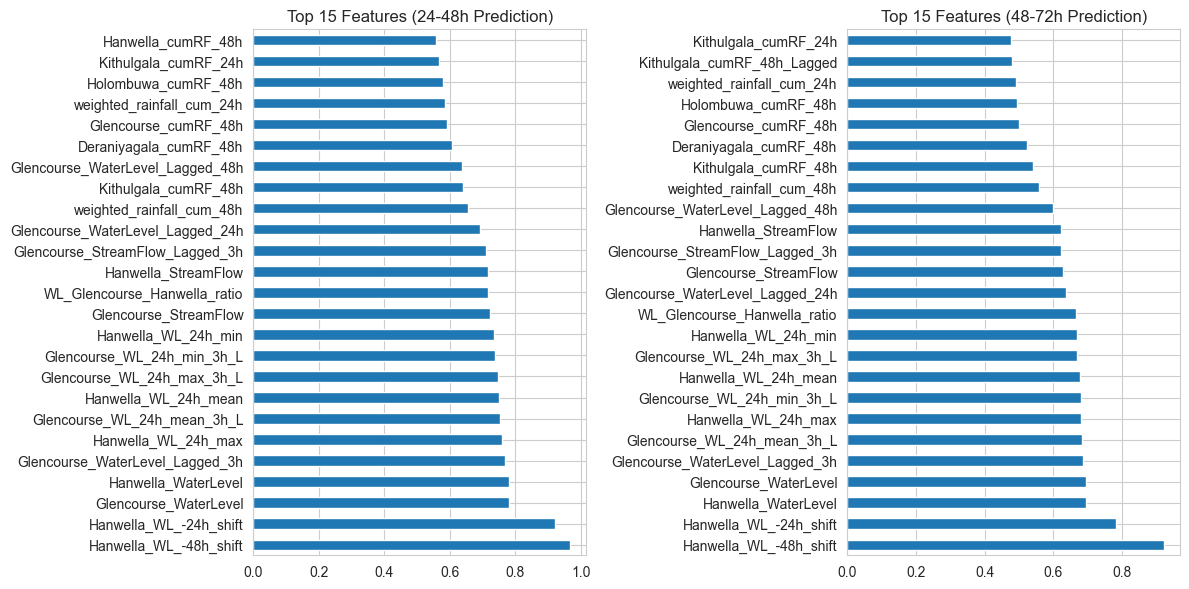

In [15]:
# Get only numeric columns
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
columns_to_scale = [col for col in numeric_columns if col not in ['Hanwella_WL_max_24_to_48h',
                                                                  'Hanwella_WL_max_48_to_72h']]

# Calculate correlations with target variables
correlations_24h = df[columns_to_scale].corrwith(df['Hanwella_WL_max_24_to_48h'])
correlations_48h = df[columns_to_scale].corrwith(df['Hanwella_WL_max_48_to_72h'])

# Plot top 15 most important features for each target
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
correlations_24h.abs().nlargest(25).plot(kind='barh')
plt.title('Top 15 Features (24-48h Prediction)')

plt.subplot(1, 2, 2)
correlations_48h.abs().nlargest(25).plot(kind='barh')
plt.title('Top 15 Features (48-72h Prediction)')
plt.tight_layout()
plt.show()


In [16]:
# Save the processed dataset
df.to_csv('processed_data_with_features_24-48.csv', index=False)